In [1]:
from typing import Callable, Tuple
from finite_distributions.FiniteDistribution import FiniteDistribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sinkhorn.SinkhornRunner as SinkhornRunner
import sinkhorn.SinkhornKernels as skern
import visualizer.joint_distribution_visualizer as jdv

In [2]:
def gaussian_prob(mu: float, sigma: float, x: float):
    return np.exp(-(x - mu)**2 / (2 * sigma * sigma))

In [3]:
mu_1 = -0.0
sigma_1 = 1.0

mu_2 = 0.0
sigma_2 = np.sqrt(2)

In [4]:
xs = [round(x, 5) for x in np.linspace(-5, 5, 25)]

In [5]:
s1 = np.sum([gaussian_prob(mu_1, sigma_1, x) for x in xs])
s2 = np.sum([gaussian_prob(mu_2, sigma_2, x) for x in xs])

dist_1 = FiniteDistribution({x: gaussian_prob(mu_1, sigma_1, x) / s1 for x in xs})
dist_2 = FiniteDistribution({x: gaussian_prob(mu_2, sigma_2, x) / s2 for x in xs})

product_distribution = dist_1.productDistribution(dist_2)

In [6]:
c = lambda x, y: 0.5 * (x - y)**2

In [34]:
# p-norm
p = 6.
sinkhorn_runner = skern.get_pnorm_regularized_runner(p, c)
# entropic
sinkhorn_runner_entropic = skern.get_entropically_regularized_runner(c)


epsilons = np.linspace(0.1, 2., 20)
maps = {}
for epsilon in epsilons:
    delta = 0.01
    pi_p, f_p, g_p = sinkhorn_runner.run_sinkhorn(dist_1, dist_2, epsilon, delta)

    maps[epsilon] = (pi_p, f_p, g_p)
# pi_e, f_e, g_e = sinkhorn_runner_entropic.run_sinkhorn(dist_1, dist_2, epsilon, delta)

In [35]:
q = p / (p - 1)

avgs = []
for epsilon in epsilons:
    (pi, f, g) = maps[epsilon]
    # regularizer = lambda tup: epsilon * np.power((f[tup[0]] + g[tup[1]] - c(tup[0], tup[1]))/epsilon, q) / q
    coupled_term = lambda tup: c(tup[0], tup[1]) * np.power(np.max((f[tup[0]] + g[tup[1]] - c(tup[0], tup[1]), 0))/epsilon, q - 1) / q
    value = product_distribution.integrate(coupled_term)
    avgs.append(value)

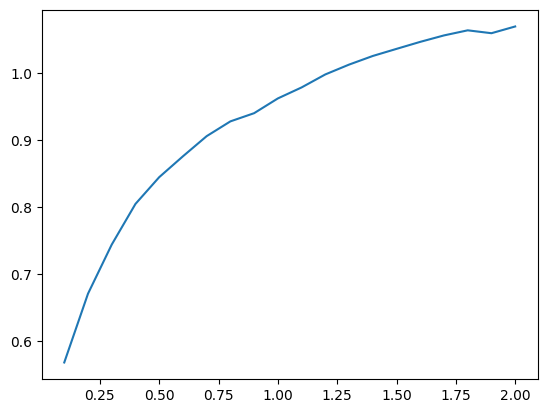

In [36]:
plt.figure()
plt.plot(epsilons, np.array(avgs))
plt.show()